Fourier Transform

In [54]:
import numpy as np
import scipy
import cv2
import matplotlib.pyplot as plt
# 4 x 4 fourier matrix
i = complex(0,1)
M = np.matrix([[1,1,1,1], [1, -i,-1, i], [1,-1,1,-1], [1,i,-1,-i]])
M_T = M.transpose()
print(M_T)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]
 [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]]


1D fourier transform

In [34]:
input_mat = np.matrix([4, -4, 4, -4])
F = np.dot(M, input_mat.T)
print(F)

[[ 0.+0.j]
 [ 0.+0.j]
 [16.+0.j]
 [ 0.+0.j]]


2D fourier transform

In [57]:
matrix_2d = np.matrix([[0,4,3,1],[4,0,2,3], [2,1,0,0], [1,3,3,1]])
interim = np.dot(M, matrix_2d)
# print(interim)
F2 = np.dot(interim, M_T)
# print(F2)

print(np.fft.fft2(matrix_2d))

[[ 28.+0.j  -1.-3.j   2.+0.j  -1.+3.j]
 [  5.-1.j   0.-6.j  -3.-3.j -10.-2.j]
 [ -6.+0.j  -1.-5.j  -4.+0.j  -1.+5.j]
 [  5.+1.j -10.+2.j  -3.+3.j   0.+6.j]]


Inverse Fourier Transform

In [36]:
print(np.fft.ifft2(F2))

[[2.+0.j 2.+0.j 2.+0.j 2.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [2.+0.j 2.+0.j 2.+0.j 2.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Hadarmard Transform 

In [37]:
def recursiveKronecker (k , hmat):
    if 2**(k-1)==1:
        return hmat
    else:
        return np.kron(hmat, recursiveKronecker(k-1, hmat))
k =2
h2 = np.matrix([[1,1], [1,-1]])
M_H = recursiveKronecker(k, h2)
M_H_T = M_H.T

1D Hadamard

In [38]:
input_mat_h = np.matrix([2,3,1,2])
H = np.dot(M_H, input_mat_h.T)
print(H)

[[ 8]
 [-2]
 [ 2]
 [ 0]]


2D Hadamard

In [39]:
matrix_2dh = np.matrix([[2,2,2,2],[2,2,2,2], [0,0,0,0], [0,0,0,0]])
interim_h = np.dot(M_H, matrix_2dh)
F2H = np.dot(interim_h, M_H_T)
print(F2H)

[[16  0  0  0]
 [ 0  0  0  0]
 [16  0  0  0]
 [ 0  0  0  0]]


Walsh - Hadamard Transform

In [40]:
l=[]
for rows in range(M_H.shape[0]):
    zero_crossings = np.where(np.diff(np.sign(M_H[rows])))[0]
    l.append(len(zero_crossings))
    
walsh_matrix = np.empty([M_H.shape[0], M_H.shape[1]])
for i in range(len(l)):
    walsh_matrix[l[i]] = M_H[i]
print(walsh_matrix)

[[ 1.  1.  1.  1.]
 [ 1.  1. -1. -1.]
 [ 1. -1. -1.  1.]
 [ 1. -1.  1. -1.]]


2D Walsh

In [41]:
matrix_2dw = np.matrix([[2,2,2,2],[2,2,2,2], [0,0,0,0], [0,0,0,0]])
interim_w = np.dot(walsh_matrix, matrix_2dw)
F2W = np.dot(interim_w, walsh_matrix.T)
print(F2W)

[[16.  0.  0.  0.]
 [16.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [42]:
# inverse of walsh matrix is
T = np.linalg.inv(walsh_matrix)
print(np.dot(np.dot(T, F2W), T.transpose()))

[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [43]:
#applying 2d dct
from scipy.fftpack import dct
dct((dct(M.T).T))

array([[16.        +0.j        , 14.78207252+0.j        ,
        11.3137085 +0.j        ,  6.12293492+0.j        ],
       [14.78207252+0.j        , -4.48528137-6.82842712j,
        -3.06146746+7.39103626j, -2.82842712+2.82842712j],
       [11.3137085 +0.j        , -3.06146746+7.39103626j,
         0.        -8.j        , -7.39103626-3.06146746j],
       [ 6.12293492+0.j        , -2.82842712+2.82842712j,
        -7.39103626-3.06146746j, 12.48528137-1.17157288j]])

In [44]:
import scipy
A = [[1,1,1],[1, -8, 1],[1,1,1]]
B = [[3,1,2], [3,38,1], [4,2,5]]
C = scipy.signal.fftconvolve(A, B, mode="same")
print(C)





[[  18.   39.   24.]
 [  24. -283.   40.]
 [  11.   35.    1.]]


The resolution is:  (4608, 3456)
The size is:  15925248


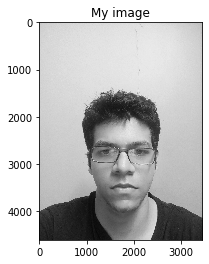

In [59]:
MITHIL = cv2.imread("MITHIL.jpg", 0)

plt.imshow(MITHIL, cmap = "gray")
plt.title("My image")
print("The resolution is: ",MITHIL.shape)
print("The size is: ",MITHIL.size)

Text(0.5, 1.0, 'negative image')

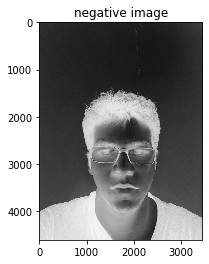

In [62]:
y = np.shape(MITHIL)
z = np.zeros(y)
z = 255- MITHIL

plt.imshow(z, cmap ="gray")
plt.title("negative image")

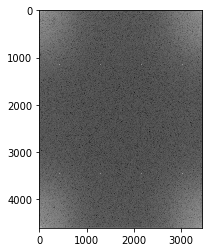

In [46]:
img_c1 = np.fft.fft2(MITHIL)
plt.imshow(np.log(1+np.abs(img_c1)), "gray")

In [ ]:
# scale_percent = 20  # percent of original size
# width = int(MITHIL.shape[1] * scale_percent / 100)
# height = int(MITHIL.shape[0] * scale_percent / 100)
# dim = (width, height)
# # resize image
# resized = cv2.resize(MITHIL, dim, interpolation=cv2.INTER_AREA)
# plt.imshow(resized, cmap = "gray")
# print(resized.size)

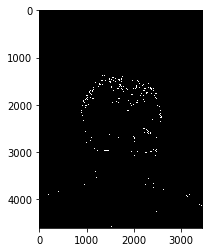

In [50]:
edges = cv2.Canny(MITHIL,0,255)
plt.imshow(edges,cmap = 'gray')